In [1]:
from my_hmf import *
import numpy as np
import matplotlib.pyplot as plt

### Test du changement de redshift

In [2]:
cosmo_params = {
    "H0": 70,
    "Om0": 0.294,
    "Ob0": 0.022 / 0.7**2,
    "ns": 0.965,
    "As": 2e-9
}

z = 1

In [3]:
mf1 = My_Tinker08(z=z, cosmo_params=cosmo_params)
mf2 = My_Tinker08(z=0, cosmo_params=cosmo_params)

mf2.set_z(z=z)

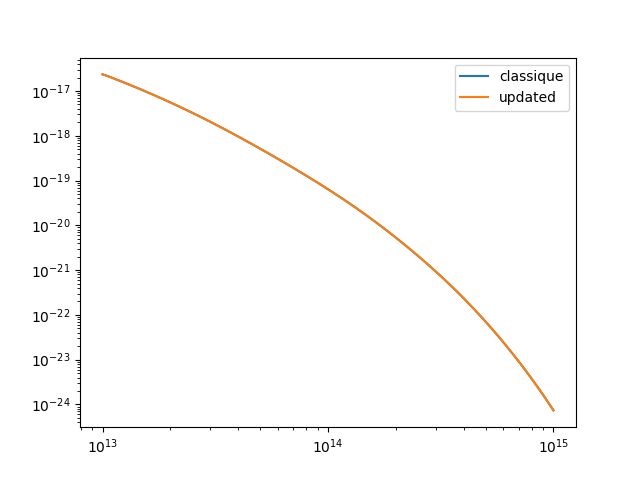

In [5]:
# %matplotlib widget
## Test dndm
plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.plot(mf1.m, mf1.dndm, label="classique")
plt.plot(mf2.m, mf2.dndm, label="updated")
plt.legend()
plt.show()

### Test du calcul du number count

In [3]:
N = 5
zmax = 1

In [5]:
s = Study(N,zmax,cosmo_params)
number_count = get_number_count(cosmo_params, N, zmax)

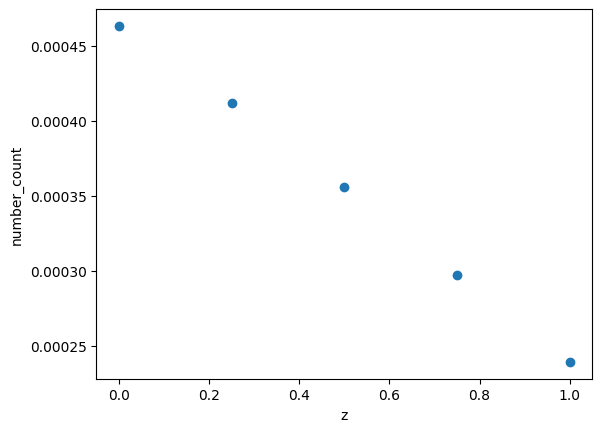

In [6]:
plt.figure()
# plt.xscale("log")
# plt.yscale("log")
plt.plot(s.z, number_count, 'o')
plt.xlabel("z")
plt.ylabel("number_count")
plt.show()

# MCMC

In [7]:


s = Study(N,zmax, ["Om0","As"], knownpars = cosmo_params)
s.create_artificial_data(cosmo_params)

thetai = [0.4, 5e-9]
res = s.calc_params(thetai)

print("\n")
print(f"Le vrai : {cosmo_params['Om0']}")
print(f"Résultat : {res}")

: 